In [1]:
# Import all the awesome modules and settings!
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline
pd.options.display.max_rows = 100

In [2]:
# Check my home directory. This is important for Git.
os.getcwd()

'E:\\Maribel\\Documents\\Data Science Springboard\\Capstone 1\\Capstone_1-_Predict_House_Prices'

In [3]:
# I use the absolute path as I'm not sure yet how to use the relative path.
# I import the file, print out the # of rows and columns, and see a sample of the dataframe.
file = r"E:\Maribel\Documents\Data Science Springboard\Capstone 1\Data\train.csv"
df = pd.read_csv(file)
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# I want to see the column names.
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# I want to see the count of non-null values and if the columns are numeric or categorical.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# I want to see which columns have categorical features (strings).
vo_object = [f for f in df.columns if df.dtypes[f] == 'object']
vo_object = pd.DataFrame(vo_object)
vo_object.rename(columns={0: 'Object_Type'}, inplace=True)
vo_object

,Object_Type
0,MSZoning
1,Street
2,Alley
3,LotShape
4,LandContour
5,Utilities
6,LotConfig
7,LandSlope
8,Neighborhood
9,Condition1


In [7]:
# I want to see which columns are numerical (int and floats).
vo_numeric = [f for f in df.columns if df.dtypes[f] != 'object']
vo_numeric = pd.DataFrame(vo_numeric)
vo_numeric.drop([0], inplace=True)
vo_numeric.rename(columns={0: 'Numeric_Type'}, inplace=True)
vo_numeric.reset_index(inplace=True)
vo_numeric.drop(columns='index', inplace=True)
vo_numeric

,Numeric_Type
0,MSSubClass
1,LotFrontage
2,LotArea
3,OverallQual
4,OverallCond
5,YearBuilt
6,YearRemodAdd
7,MasVnrArea
8,BsmtFinSF1
9,BsmtFinSF2


In [8]:
# I want to see how many unique values exist in my dataframe.
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [9]:
#I want to see the percent of unique values per column.
df.nunique()/df.shape[0] * 100

Id               100.000000
MSSubClass         1.027397
MSZoning           0.342466
LotFrontage        7.534247
LotArea           73.493151
Street             0.136986
Alley              0.136986
LotShape           0.273973
LandContour        0.273973
Utilities          0.136986
LotConfig          0.342466
LandSlope          0.205479
Neighborhood       1.712329
Condition1         0.616438
Condition2         0.547945
BldgType           0.342466
HouseStyle         0.547945
OverallQual        0.684932
OverallCond        0.616438
YearBuilt          7.671233
YearRemodAdd       4.178082
RoofStyle          0.410959
RoofMatl           0.547945
Exterior1st        1.027397
Exterior2nd        1.095890
MasVnrType         0.273973
MasVnrArea        22.397260
ExterQual          0.273973
ExterCond          0.342466
Foundation         0.410959
BsmtQual           0.273973
BsmtCond           0.273973
BsmtExposure       0.273973
BsmtFinType1       0.410959
BsmtFinSF1        43.630137
BsmtFinType2       0

In [10]:
# I want to see the min and max of each column.
df.agg([min,max]).T

,min,max
Id,1,1460
MSSubClass,20,190
MSZoning,C (all),RM
LotFrontage,21,313
LotArea,1300,215245
Street,Grvl,Pave
LotShape,IR1,Reg
LandContour,Bnk,Lvl
Utilities,AllPub,NoSeWa
LotConfig,Corner,Inside


In [11]:
# I want to see the summary statistics of each numerical column.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Text(0.5, 1.0, 'Percent missing data by feature')

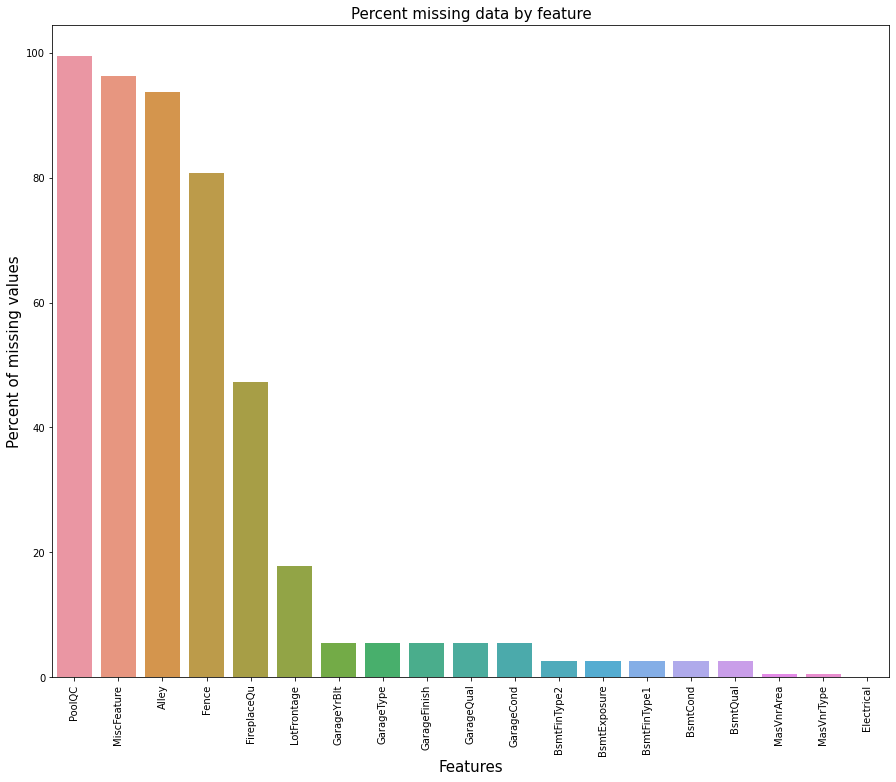

In [12]:
# Visualization of missing values. It's "perty!"
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_na.index, y=df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


In [13]:
# Column, Count, and Percent of missing values.
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [14]:
'''
The following cells are imputations of the missing values. 
When a variable does not have it's respective feature, I used "None" value  for categorical features and "0" for numerical features.
"Data Description Text file" is abbreviated to DDTF. 
'''

'\nThe following cells are imputations of the missing values. \nWhen a variable does not have it\'s respective feature, I used "None" value  for categorical features and "0" for numerical features.\n"Data Description Text file" is abbreviated to DDTF. \n'

In [15]:
# PoolQC : DDTF says NA means "No Pool". 
df["PoolQC"] = df["PoolQC"].fillna("None")

In [16]:
# DDTF says NA means "no misc feature". 
df["MiscFeature"] = df["MiscFeature"].fillna("None")

In [17]:
# DDTF says NA means "no alley access".
df["Alley"] = df["Alley"].fillna("None")

In [18]:
# DDTF data description says NA means "no fence".
df["Fence"] =df["Fence"].fillna("None")

In [19]:
# DDTF says NA means "no fireplace".
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [20]:
# Used median as the area of the connecting street, to the property, should be similar to other homes in it's neighborhood. 
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [21]:
# Replaced with "None".
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [22]:
# Replaced with zero.
for col in ('GarageYrBlt', 'GarageArea'):
    df[col] = df[col].fillna(0)

In [23]:
# Replaced with zero as these variables probably do not have a basement in the first place.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [24]:
# NA most probably means homes do not have masonry veneer installed.
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [25]:
# Electrical only has one NA value so I imputed using the Mode.
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [26]:
# Do I still have anymore NaN values?
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent


In [27]:
# I'm checking for duplicate rows.
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
'''
Everything below is part of EDA and I will work on it once I get to that module.
'''

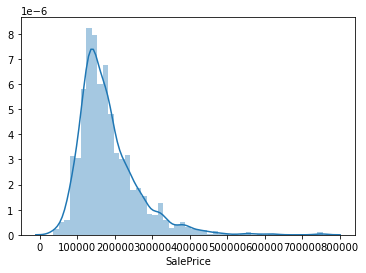

In [14]:
sns.distplot(df['SalePrice'])

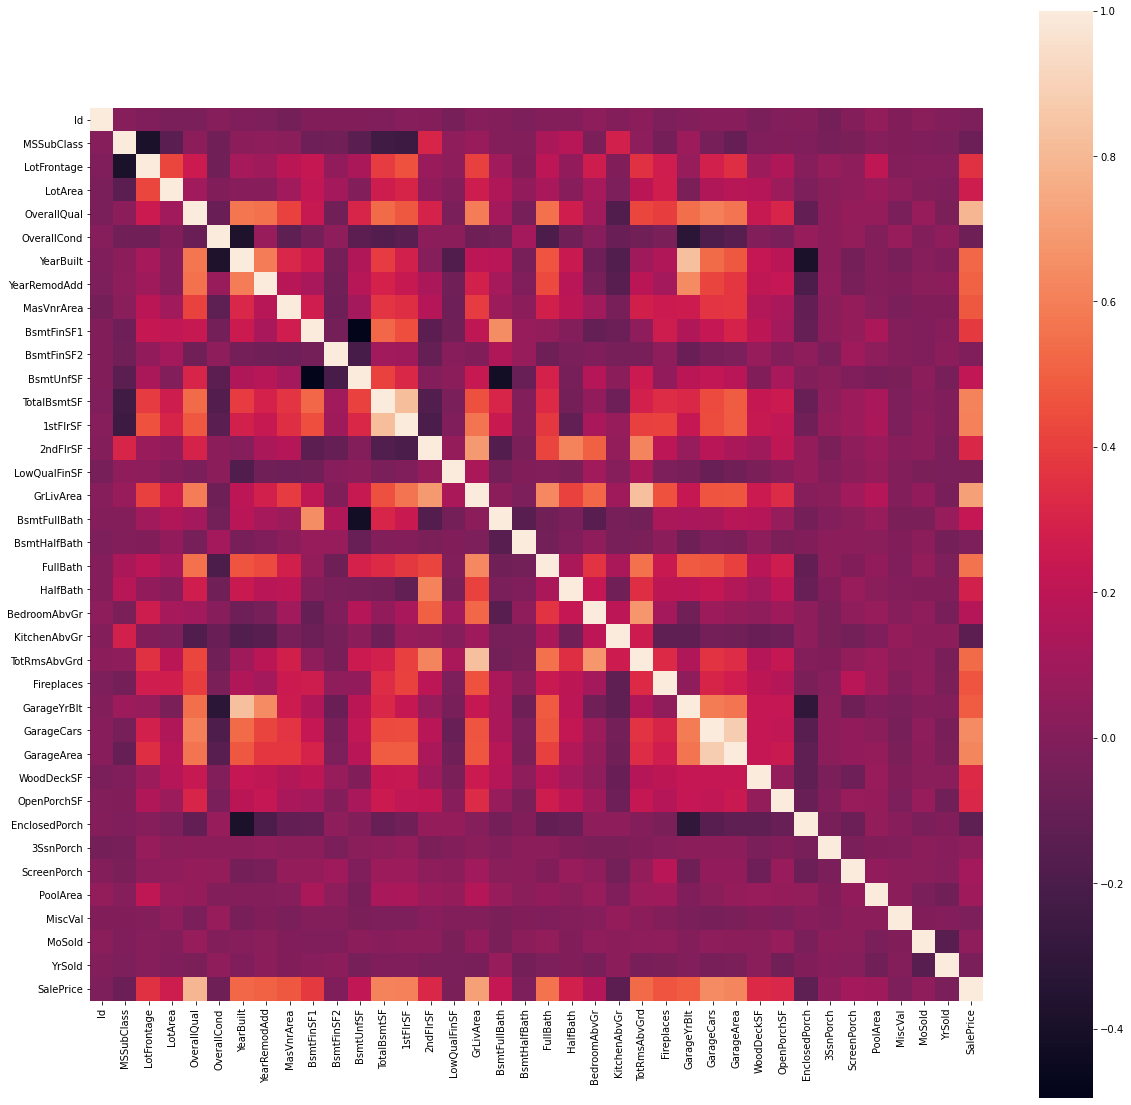

In [20]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=1, square=True);

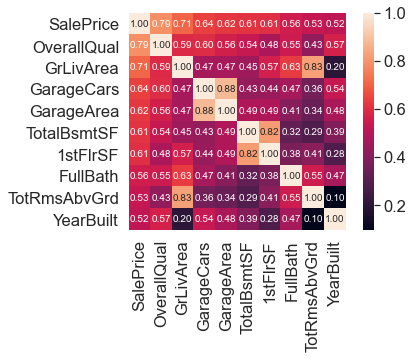

In [37]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,)
plt.show()

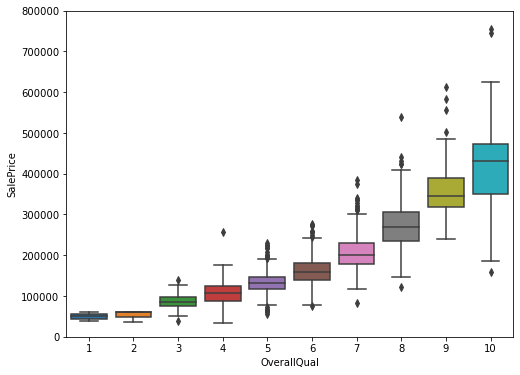

In [17]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

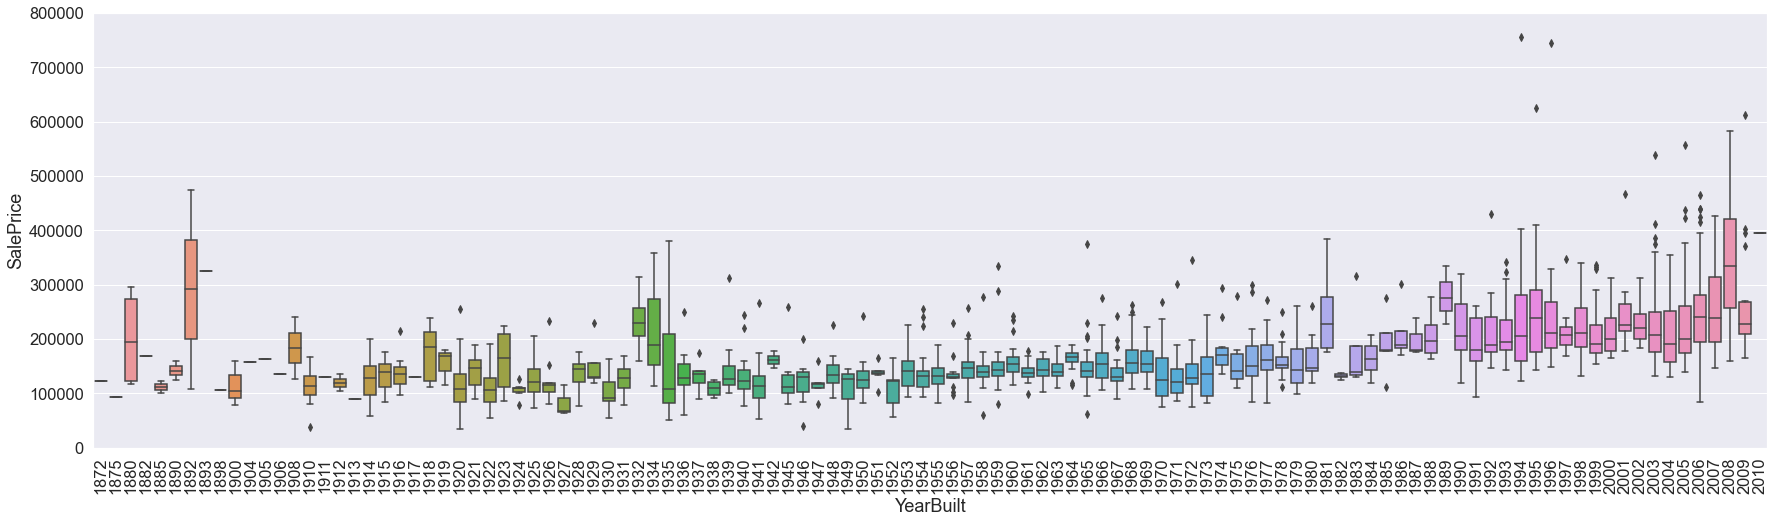

In [38]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);